# Analysis and visualization of M&Ms

In [39]:
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
participants = pd.read_csv('data/participants.txt',sep='\t')
participants.head()

,participant_id,continent_of_origin
0,1,North America
1,2,Europe
2,3,North America
3,4,Europe
4,5,Europe


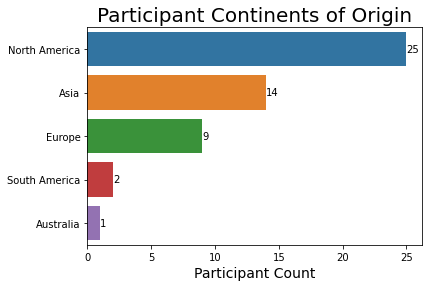

In [31]:
# plot the distriubtion of particpants across continents
con_counts = participants['continent_of_origin'].value_counts()

ax = sns.barplot(y=con_counts.keys(),x=con_counts.values)
ax.bar_label(ax.containers[0])
plt.xlabel("Participant Count", fontsize=14)
plt.title("Participant Continents of Origin",fontsize=20)
plt.show()

In [32]:
# mapping of participant to continent
p2c = dict(participants.values)

In [4]:
# load M&M id data
mnms = pd.read_csv('data/mnm.txt',sep='\t')
mnms.head()

,mnm_id,origin
0,1,USA
1,2,Denmark


In [89]:
# mapping of mnm id to origin
m2o = dict(mnms.values)
m2o

{1: 'USA', 2: 'Denmark'}

In [143]:
# load taste experiemnt data
df = pd.read_csv('data/taste_data.txt',sep='\t').fillna("")
df.head()

,particpant_id,mnm_id,mnm_color,taste_response,notes
0,1,2,green,normal,
1,1,1,orange,bad,
2,1,1,blue,normal,
3,1,2,brown,normal,
4,1,1,yellow,bad,


In [144]:
# add continent column
df['continent'] = df['particpant_id'].apply(lambda x: p2c[x])
df['mnm_origin'] = df['mnm_id'].apply(lambda x: m2o[x])
df.head()

,particpant_id,mnm_id,mnm_color,taste_response,notes,continent,mnm_origin
0,1,2,green,normal,,North America,Denmark
1,1,1,orange,bad,,North America,USA
2,1,1,blue,normal,,North America,USA
3,1,2,brown,normal,,North America,Denmark
4,1,1,yellow,bad,,North America,USA


## overall taste evalution of M&Ms

In [145]:
order = ['bad','normal','good']

alt.Chart(df).mark_bar(size=90).encode(
    x=alt.X('mnm_origin:N',title="M&M origin",axis=alt.Axis(labelAngle=0)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending')
).properties(width=210)

alt.Chart(...)

In [146]:
df['continent_adj'] = df['continent'].apply(lambda x: 'Aus/SA' if x in ['Australia','South America'] else x)
df

,particpant_id,mnm_id,mnm_color,taste_response,notes,continent,mnm_origin,continent_adj
0,1,2,green,normal,,North America,Denmark,North America
1,1,1,orange,bad,,North America,USA,North America
2,1,1,blue,normal,,North America,USA,North America
3,1,2,brown,normal,,North America,Denmark,North America
4,1,1,yellow,bad,,North America,USA,North America
...,...,...,...,...,...,...,...,...
505,52,1,red,good,,Europe,USA,Europe
506,52,2,red,bad,,Europe,Denmark,Europe
507,52,1,brown,bad,,Europe,USA,Europe
508,52,2,brown,good,,Europe,Denmark,Europe


In [147]:
order = ['bad','normal','good']

alt.Chart(df).mark_bar(size=40).encode(
    x=alt.X('mnm_origin:N',title="M&M origin",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('continent_adj:N',title='',header=alt.Header(labelFontSize=18))
).properties(width=100)

alt.Chart(...)

In [149]:
alt.Chart(df).mark_bar(size=40).encode(
    x=alt.X('mnm_origin:N',title="M&M origin",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_color:N',title='',header=alt.Header(labelFontSize=18))
).properties(width=100)

alt.Chart(...)

In [158]:
alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('mnm_color:N',title="M&M color",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_origin:N',title='M&M Origin',header=alt.Header(labelFontSize=10))
).properties(width=190)

alt.Chart(...)

In [159]:
alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('mnm_color:N',title="M&M color",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses"),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_origin:N',title='M&M Origin',header=alt.Header(labelFontSize=10))
).properties(width=190)

alt.Chart(...)

In [160]:
alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('mnm_color:N',title="M&M color",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses"),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    #column=alt.Column('mnm_origin:N',title='M&M Origin',header=alt.Header(labelFontSize=10))
).properties(width=190)

alt.Chart(...)

In [170]:
alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('mnm_origin:N',title="M&M Origin",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="").stack("normalize"),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_color:N',title='M&M Color',header=alt.Header(labelFontSize=10)),
    row=alt.Row('continent_adj:N',title='Percent of Responses')
).properties(width=75,height=70)

alt.Chart(...)